#Importing Required Libraries

In [18]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,  export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from matplotlib import style


In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Iris.csv to Iris.csv
User uploaded file "Iris.csv" with length 5107 bytes


#Data Visualization

In [4]:
iris_df=pd.read_csv('Iris.csv')

In [5]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris_df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
iris_df= iris_df.drop('Id', axis=1)

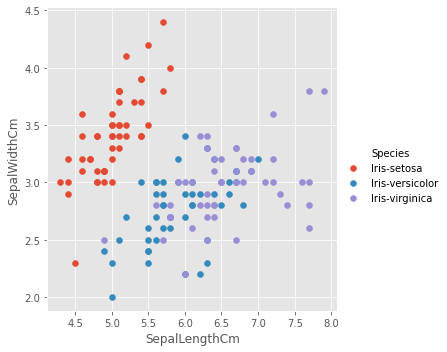

In [8]:
style.use('ggplot')
sns.FacetGrid(iris_df, hue="Species", height=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();


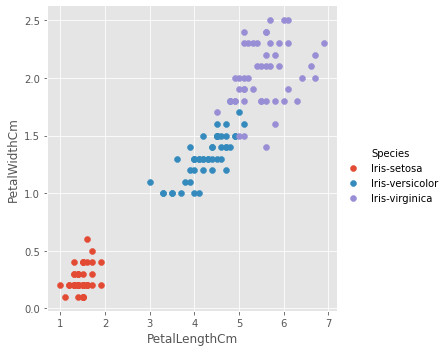

In [9]:
sns.FacetGrid(iris_df, hue="Species", height=5) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend();


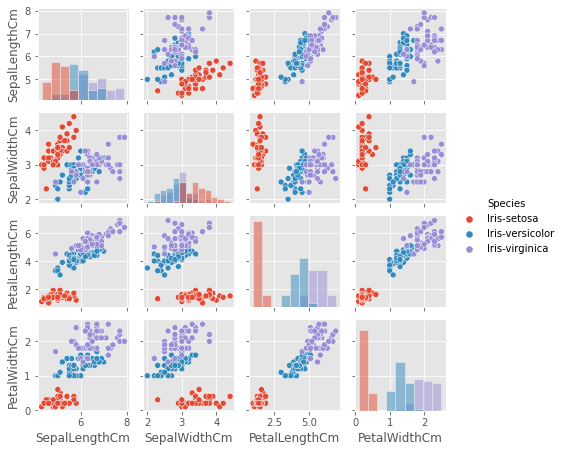

In [10]:
sns.pairplot(iris_df, hue="Species", diag_kind="hist", height=1.6)
plt.show()

#Decision Tree Classifier

In [12]:
X=iris_df.iloc[:,0:4]
x=iris_df.iloc[:,0:4].values
y=iris_df.iloc[:,-1]

In [95]:
Tree_cla = DecisionTreeClassifier()

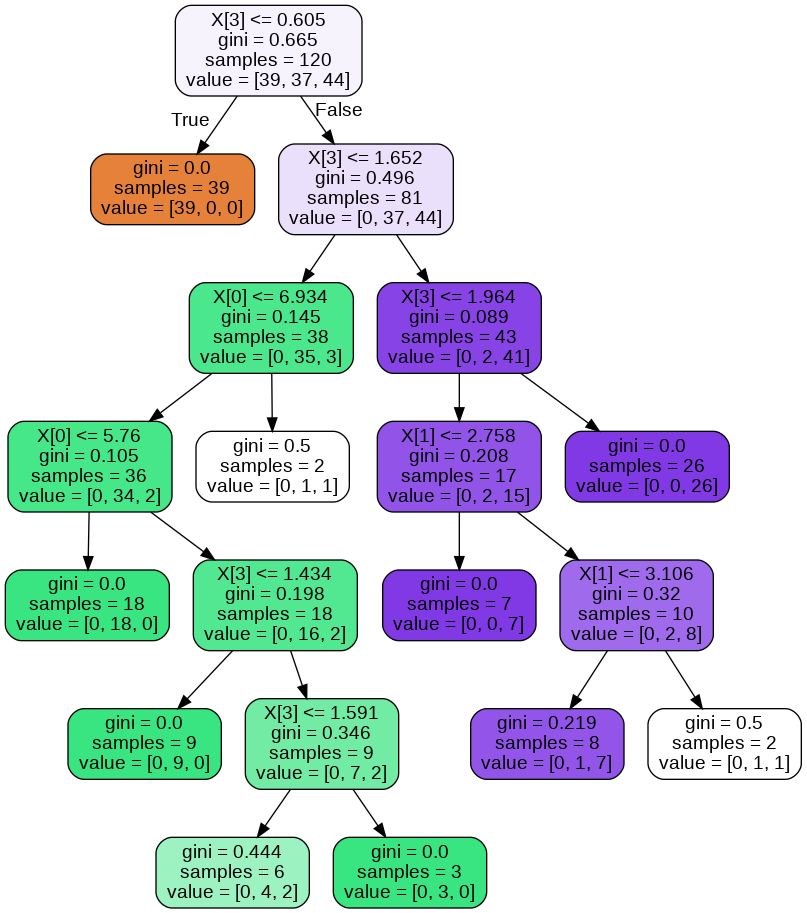

In [29]:
feature_name=list(X.columns)
class_name = list(y_train.unique())

# create a dot_file which stores the tree structure
dot_data = export_graphviz(dtc,rounded = True,filled = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [68]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(3,40,1),
    'min_samples_leaf' : range(1,20,1),
    'min_samples_split': range(2,20,1),
    'splitter' : ['best', 'random'],
    'max_leaf_nodes':[10,20,30,50],
    
}

In [69]:
grid_search = GridSearchCV(estimator=dtc,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [71]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=70,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=9,
                                              min_samples_split=19,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='random'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                       

In [72]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 9, 'max_leaf_nodes': 20, 'min_samples_leaf': 5, 'min_samples_split': 4, 'splitter': 'random'}


In [73]:
grid_search.best_score_

0.9833333333333334

In [100]:
Tree_cla = DecisionTreeClassifier(criterion = 'gini', max_depth =9, max_leaf_nodes= 20, min_samples_leaf= 5, min_samples_split= 4, splitter ='random')
Tree_cla.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

#Model Accuracy

In [101]:
y_train_pred = Tree_cla.predict(X_train)
acc_train = accuracy_score(y_train,y_train_pred)
print("Accuracy for train Data: ",round(acc_train*100,2),"%")

Accuracy for train Data:  95.83 %


In [102]:
y_test_pred = Tree_cla.predict(X_test)
acc_test = accuracy_score(y_test,y_test_pred)
print("Accuracy for test Data: ",round(acc_test*100,2),"%")

Accuracy for test Data:  96.67 %


#Confusion Matrix

In [103]:
y_actual = pd.DataFrame(y_test.value_counts())
y_actual = y_actual.reset_index()
y_actual.columns = ['Species', 'AcutalCount']

y_predicted = pd.DataFrame(y_test_pred, columns=["Predicted"])["Predicted"]
y_predicted = pd.DataFrame(y_predicted.value_counts())
y_predicted = y_predicted.reset_index()
y_predicted.columns = ["Species","PredictCount"]
y_predicted

confusion_df = pd.merge(y_actual, y_predicted, on='Species', how='outer')
confusion_df['Error'] = abs(confusion_df['AcutalCount']-confusion_df['PredictCount'])
confusion_df

,Species,AcutalCount,PredictCount,Error
0,Iris-versicolor,13,14,1
1,Iris-setosa,11,11,0
2,Iris-virginica,6,5,1


In [97]:
con_mat = confusion_matrix(y_test,y_test_pred)

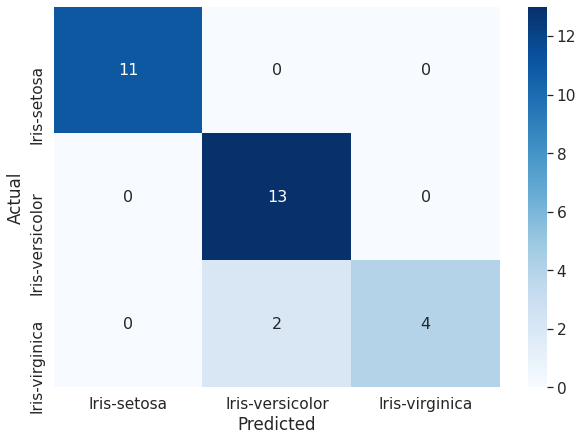

In [98]:

data = confusion_matrix(y_test, y_test_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})